In [2]:
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler,OneHotEncoder
 from sklearn.compose import ColumnTransformer
 from sklearn.pipeline import Pipeline
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data=pd.read_csv(r'C:\Users\niish\Downloads\blood.csv')

In [4]:
print(data.head())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0


In [5]:
print(data.describe())

          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


In [7]:
X = data.drop('Class', axis=1)   
y = data['Class']                

In [8]:
print(X.head()) 
print(y.head())  

   Recency  Frequency  Monetary  Time
0        2         50     12500    99
1        0         13      3250    28
2        1         17      4000    36
3        2         20      5000    45
4        1         24      6000    77
0    1
1    1
2    1
3    1
4    0
Name: Class, dtype: int64


In [9]:
# Get data types
print(data.dtypes)

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Class        int64
dtype: object


In [11]:
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [14]:
y_pred = pipeline.predict(X_test)

In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150

Confusion Matrix:
 [[99 14]
 [28  9]]


In [16]:
# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Add predictions to the test set
X_test_copy = X_test.copy()
X_test_copy['Predicted_Class'] = predictions
X_test_copy['Recommendation'] = ''

# Generate personalized recommendation
for i, row in X_test_copy.iterrows():
    if row['Predicted_Class'] == 1:
        X_test_copy.at[i, 'Recommendation'] = "Encourage regular donation. Consider rewarding loyalty."
    else:
        if row['Recency'] > 12:
            X_test_copy.at[i, 'Recommendation'] = "Send health follow-up reminder. Suggest checkup."
        elif row['Frequency'] < 2:
            X_test_copy.at[i, 'Recommendation'] = "Educate about the importance of regular donation."
        else:
            X_test_copy.at[i, 'Recommendation'] = "Send re-engagement message with benefits of donating."

# View some recommendations
print(X_test_copy[['Recency', 'Frequency', 'Monetary', 'Time', 'Predicted_Class', 'Recommendation']].head(10))

     Recency  Frequency  Monetary  Time  Predicted_Class  \
580        2          1       250     2                0   
356       16          6      1500    40                0   
133        4          6      1500    35                0   
250       11          2       500    11                0   
299       14          2       500    14                0   
388        9          3       750    52                0   
336       11          3       750    28                0   
155        2          1       250     2                0   
527        2         15      3750    64                1   
734       23          1       250    23                0   

                                        Recommendation  
580  Educate about the importance of regular donation.  
356   Send health follow-up reminder. Suggest checkup.  
133  Send re-engagement message with benefits of do...  
250  Send re-engagement message with benefits of do...  
299   Send health follow-up reminder. Suggest checkup.

In [21]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Create a copy of test set to store predictions and recommendations
results = X_test.copy()
results['Predicted_Class'] = y_pred
results['Recommendation'] = ''  # Initialize column

# Map predictions to recommendations
for i, row in results.iterrows():
    if row['Predicted_Class'] == 1:
        results.at[i, 'Recommendation'] = " Likely to donate: Send thank-you note and donation reminder."
    else:
        # Now use logic based on features
        if row['Recency'] > 12:
            results.at[i, 'Recommendation'] = " Long time since last donation: Encourage check-up and re-engagement."
        elif row['Frequency'] < 2:
            results.at[i, 'Recommendation'] = " Low donor frequency: Educate on importance of regular donations."
        elif row['Time'] < 6:
            results.at[i, 'Recommendation'] = " New donor: Build relationship with follow-ups and guidance."
        else:
            results.at[i, 'Recommendation'] = " Inconsistent pattern: Recommend a tailored donation plan."

# View sample output
print(results[['Recency', 'Frequency', 'Time', 'Predicted_Class', 'Recommendation']].head(10))


     Recency  Frequency  Time  Predicted_Class  \
580        2          1     2                0   
356       16          6    40                0   
133        4          6    35                0   
250       11          2    11                0   
299       14          2    14                0   
388        9          3    52                0   
336       11          3    28                0   
155        2          1     2                0   
527        2         15    64                1   
734       23          1    23                0   

                                        Recommendation  
580   Low donor frequency: Educate on importance of...  
356   Long time since last donation: Encourage chec...  
133   Inconsistent pattern: Recommend a tailored do...  
250   Inconsistent pattern: Recommend a tailored do...  
299   Long time since last donation: Encourage chec...  
388   Inconsistent pattern: Recommend a tailored do...  
336   Inconsistent pattern: Recommend a tailored d

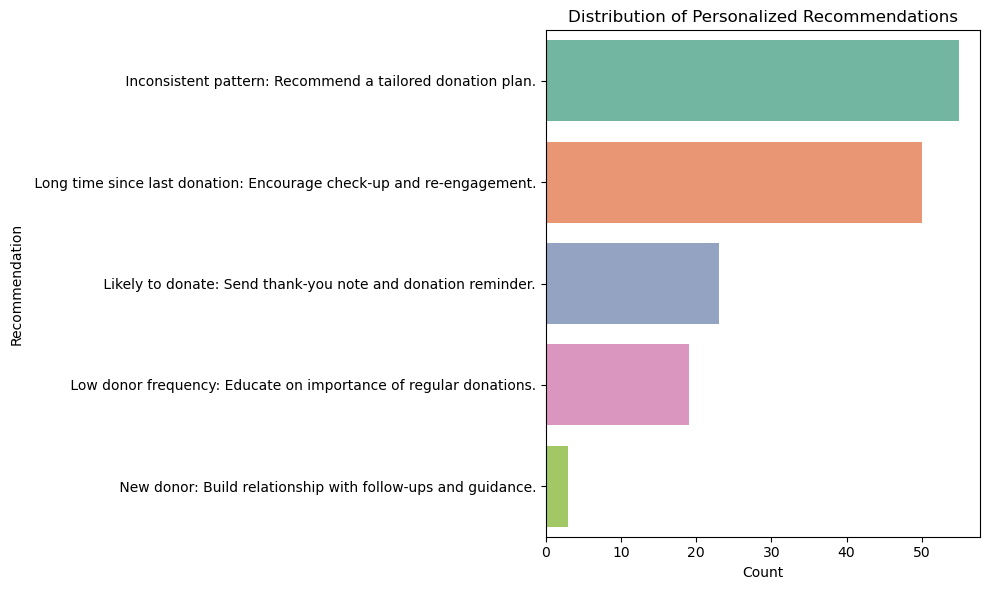

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=results, y='Recommendation', order=results['Recommendation'].value_counts().index, palette='Set2')
plt.title("Distribution of Personalized Recommendations")
plt.xlabel("Count")
plt.ylabel("Recommendation")
plt.tight_layout()
plt.show()

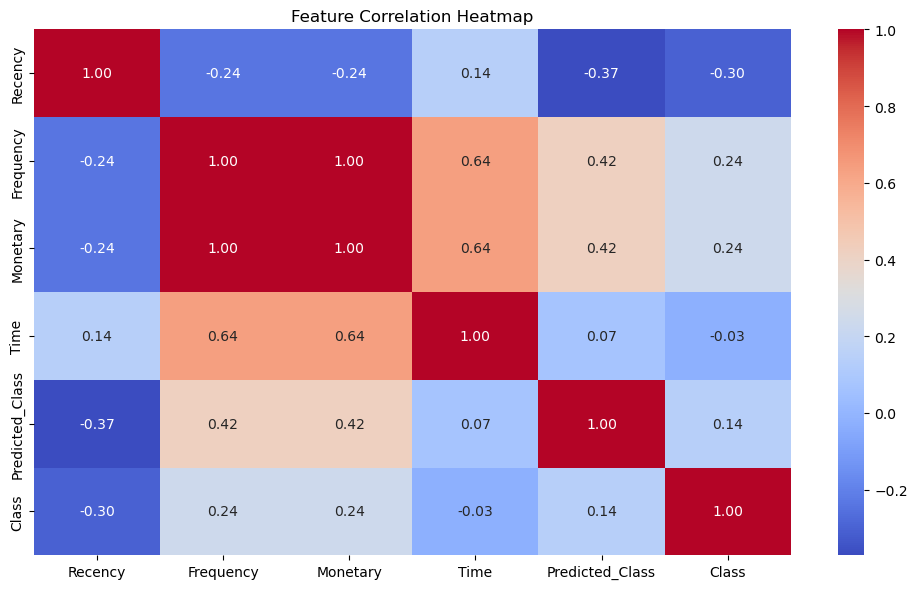

In [23]:
# Include prediction in correlation
correlation_data = results.copy()
correlation_data['Class'] = y_test.values  # actual values if available

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

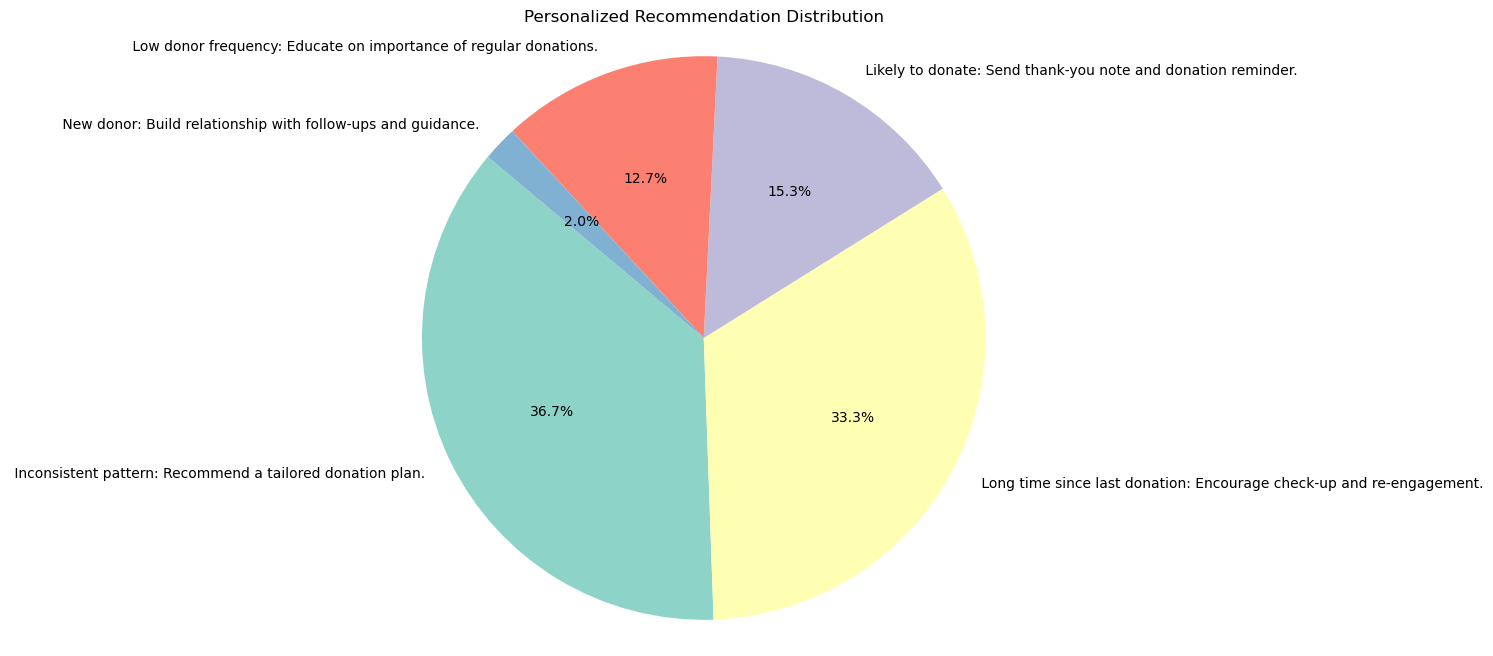

In [24]:
recommend_counts = results['Recommendation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Personalized Recommendation Distribution")
plt.axis('equal')
plt.show()

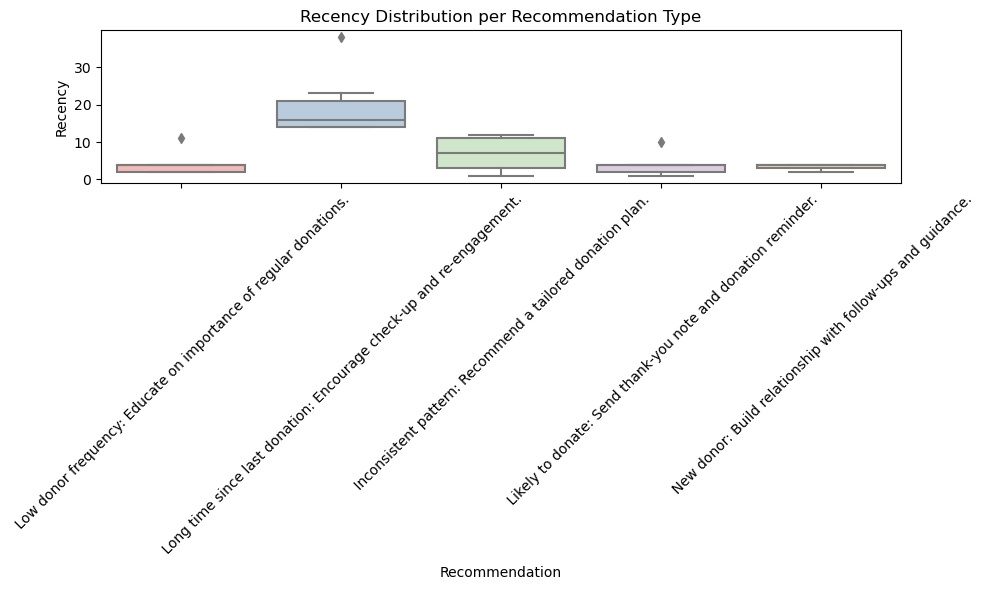

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results, x='Recommendation', y='Recency', palette='Pastel1')
plt.title("Recency Distribution per Recommendation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()